In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/VNINDEX.csv')
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,1/10/2011,483.71,485.06,479.58,480.55,33800
1,1/11/2011,477.97,480.79,475.48,477.44,35420
2,1/12/2011,480.82,481.65,477.49,478.45,41210
3,1/13/2011,479.95,485.02,479.60,484.12,29070
4,1/14/2011,487.06,490.11,486.54,489.22,41500


In [3]:
df.tail()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
2491,1/4/2021,1113.77,1126.43,1113.59,1120.47,764040
2492,1/5/2021,1116.96,1134.45,1116.49,1132.55,763430
2493,1/6/2021,1139.12,1152.85,1133.70,1143.21,790450
2494,1/7/2021,1147.26,1156.49,1143.44,1156.49,763740
2495,1/8/2021,1164.10,1176.33,1160.48,1167.69,808310


In [4]:
df = df.reset_index()
df.head()

,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,0,1/10/2011,483.71,485.06,479.58,480.55,33800
1,1,1/11/2011,477.97,480.79,475.48,477.44,35420
2,2,1/12/2011,480.82,481.65,477.49,478.45,41210
3,3,1/13/2011,479.95,485.02,479.60,484.12,29070
4,4,1/14/2011,487.06,490.11,486.54,489.22,41500


In [5]:
df = df.drop(['DATE'], axis = 1)
df.head()

,index,OPEN,HIGH,LOW,CLOSE,VOLUME
0,0,483.71,485.06,479.58,480.55,33800
1,1,477.97,480.79,475.48,477.44,35420
2,2,480.82,481.65,477.49,478.45,41210
3,3,479.95,485.02,479.60,484.12,29070
4,4,487.06,490.11,486.54,489.22,41500


In [7]:
df

,index,OPEN,HIGH,LOW,CLOSE,VOLUME
0,0,483.71,485.06,479.58,480.55,33800
1,1,477.97,480.79,475.48,477.44,35420
2,2,480.82,481.65,477.49,478.45,41210
3,3,479.95,485.02,479.60,484.12,29070
4,4,487.06,490.11,486.54,489.22,41500
...,...,...,...,...,...,...
2491,2491,1113.77,1126.43,1113.59,1120.47,764040
2492,2492,1116.96,1134.45,1116.49,1132.55,763430
2493,2493,1139.12,1152.85,1133.70,1143.21,790450
2494,2494,1147.26,1156.49,1143.44,1156.49,763740


In [8]:
df.shape

(2496, 6)

In [9]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['OPEN'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['OPEN'][int(len(df)*0.80):])

print(data_training.shape)
print(data_testing.shape)

(1996, 1)
(500, 1)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.17048436],
       [0.163907  ],
       [0.16717276],
       ...,
       [0.63761473],
       [0.6363428 ],
       [0.64504005]])

In [12]:
data_training_array.shape

(1996, 1)

In [13]:
x_train = []
y_train = []

for i in range(60, data_training_array.shape[0]):
    x_train.append(data_training_array[i-60: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train.shape, y_train.shape

((1936, 60, 1), (1936,))

In [15]:
# ML Model

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
61/61 [==============================] - 18s 180ms/step - loss: 0.0275
Epoch 2/50
61/61 [==============================] - 11s 180ms/step - loss: 0.0029
Epoch 3/50
61/61 [==============================] - 11s 185ms/step - loss: 0.0029
Epoch 4/50
61/61 [==============================] - 11s 182ms/step - loss: 0.0025
Epoch 5/50
61/61 [==============================] - 11s 184ms/step - loss: 0.0021
Epoch 6/50
61/61 [==============================] - 11s 184ms/step - loss: 0.0021
Epoch 7/50
61/61 [==============================] - 12s 201ms/step - loss: 0.0021
Epoch 8/50
61/61 [==============================] - 13s 208ms/step - loss: 0.0022
Epoch 9/50
61/61 [==============================] - 13s 211ms/step - loss: 0.0022
Epoch 10/50
61/61 [==============================] - 12s 204ms/step - loss: 0.0018
Epoch 11/50
61/61 [==============================] - 12s 189ms/step - loss: 0.0019
Epoch 12/50
61/61 [==============================] - 12s 203ms/step - loss: 0.0019
Epoch 13/50
6

In [21]:
data_testing.head()

,OPEN
1996,899.10
1997,903.83
1998,901.21
1999,911.32
2000,908.48


In [22]:
data_training.tail(60)

,OPEN
1936,973.14
1937,968.93
1938,949.94
1939,958.36
1940,950.12
1941,935.25
1942,902.59
1943,918.11
1944,895.05
1945,881.32


In [23]:
past_60_days = data_training.tail(60)
final_df = past_60_days.append(data_testing, ignore_index = True)
final_df.head()

,OPEN
0,973.14
1,968.93
2,949.94
3,958.36
4,950.12


In [24]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.62208589],
       [0.61375421],
       [0.57617257],
       [0.59283594],
       [0.57652879],
       [0.54710073],
       [0.48246586],
       [0.51318029],
       [0.46754403],
       [0.44037206],
       [0.46592123],
       [0.50805462],
       [0.4998021 ],
       [0.51864239],
       [0.53868989],
       [0.52093806],
       [0.53411835],
       [0.51911736],
       [0.49586384],
       [0.48594894],
       [0.48557293],
       [0.47957649],
       [0.48018999],
       [0.4825846 ],
       [0.49665545],
       [0.49679398],
       [0.52667722],
       [0.52465862],
       [0.50835147],
       [0.52705324],
       [0.52309519],
       [0.54636849],
       [0.52580645],
       [0.55194934],
       [0.58216901],
       [0.57696418],
       [0.59042153],
       [0.58913517],
       [0.58630517],
       [0.58802691],
       [0.58879873],
       [0.59861468],
       [0.59366713],
       [0.57251138],
       [0.5439343 ],
       [0.52948743],
       [0.50801504],
       [0.500

In [25]:
input_data.shape

(560, 1)

In [26]:
x_test = []
y_test = []

for i in range(60, input_data.shape[0]):
    x_test.append(input_data[i-60: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [27]:
x_test.shape, y_test.shape

((500, 60, 1), (500,))

In [28]:
# Making predictions
y_predicted = model.predict(x_test)
y_predicted.shape

(500, 1)

In [29]:
y_test

array([0.47555907, 0.48491985, 0.47973481, 0.49974273, 0.4941223 ,
       0.48268355, 0.48773006, 0.50253315, 0.48867999, 0.49428063,
       0.49487433, 0.50213734, 0.50439343, 0.50520483, 0.5151791 ,
       0.50104888, 0.50942015, 0.5374431 , 0.55177123, 0.56944389,
       0.58005145, 0.58588957, 0.60170196, 0.60259252, 0.6214526 ,
       0.64355828, 0.66744508, 0.65867801, 0.65468039, 0.65513556,
       0.61794973, 0.64258856, 0.65561053, 0.66140906, 0.66663368,
       0.65127647, 0.64148031, 0.65770829, 0.68266376, 0.6878488 ,
       0.69194538, 0.683396  , 0.70245399, 0.68090243, 0.68537502,
       0.64535919, 0.62879478, 0.61601029, 0.62907184, 0.6226796 ,
       0.64624975, 0.63716604, 0.66509005, 0.64504255, 0.65044528,
       0.64933703, 0.65398773, 0.67502474, 0.6451415 , 0.64448842,
       0.64488423, 0.61759351, 0.63006135, 0.61488225, 0.61244805,
       0.60356224, 0.60566   , 0.61519889, 0.62865624, 0.62153176,
       0.63330695, 0.62926974, 0.60472986, 0.59867406, 0.57648

In [30]:
y_predicted

array([[0.45130384],
       [0.4501739 ],
       [0.45033646],
       [0.45153683],
       [0.45380694],
       [0.45692265],
       [0.4603011 ],
       [0.46352607],
       [0.46660697],
       [0.46927035],
       [0.47142816],
       [0.47307444],
       [0.474388  ],
       [0.47555888],
       [0.476713  ],
       [0.47809833],
       [0.4795282 ],
       [0.48097742],
       [0.4829852 ],
       [0.48610795],
       [0.49082732],
       [0.4974355 ],
       [0.50587904],
       [0.5160192 ],
       [0.5272845 ],
       [0.53933686],
       [0.55218434],
       [0.5660814 ],
       [0.58036244],
       [0.5939653 ],
       [0.60599524],
       [0.61439157],
       [0.61925286],
       [0.6219807 ],
       [0.62385875],
       [0.62577903],
       [0.6272619 ],
       [0.6276786 ],
       [0.6278392 ],
       [0.62936234],
       [0.6324336 ],
       [0.63693696],
       [0.64218545],
       [0.6481215 ],
       [0.6537625 ],
       [0.65828323],
       [0.65934795],
       [0.656

In [31]:
scaler = scaler.scale_
scaler

array([0.00197902])

In [32]:
scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

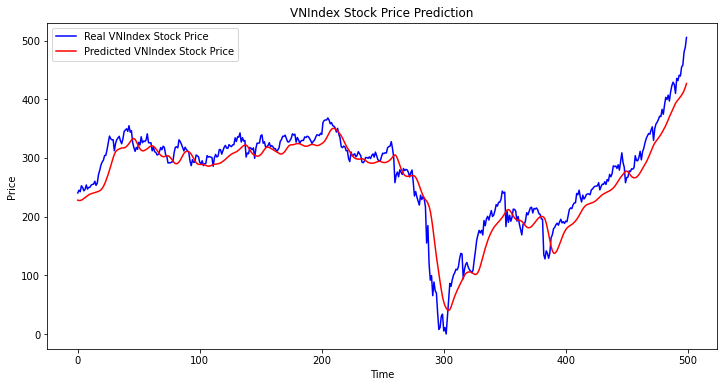

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Real VNIndex Stock Price')
plt.plot(y_predicted, 'r', label = 'Predicted VNIndex Stock Price')
plt.title('VNIndex Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()